# Data Manipulation / Munging 

## 1. Missing Values treatment

In [1]:
import numpy as np
import pandas as pd

In [2]:
missing = np.nan
series_obj = pd.Series([1, 6,7, missing,29,38,5 , missing,])
series_obj

0     1.0
1     6.0
2     7.0
3     NaN
4    29.0
5    38.0
6     5.0
7     NaN
dtype: float64

In [3]:
# The .isnull() method returns a Boolean value that describes (True or False) whether an element in a 
# Pandas object is a null value.
series_obj.isnull()

0    False
1    False
2    False
3     True
4    False
5    False
6    False
7     True
dtype: bool

### Filling in for missing values

In [28]:
DF_obj = pd.DataFrame(np.random.randn(36).reshape(6,6))
DF_obj

,0,1,2,3,4,5
0,1.036600,0.875826,-1.063670,-2.090424,-0.556902,-0.874541
1,-0.751612,-0.562601,-0.962428,-1.273584,-0.891000,-0.527918
2,-1.256179,-0.539893,0.052556,-1.322809,-0.009116,1.436918
3,-0.267130,-0.323202,-0.459888,-0.183157,1.143741,-0.575921
4,0.613772,-0.528665,1.101044,-0.888517,-0.656002,-1.368953
5,-0.350897,-1.032733,1.394555,0.584761,-0.124655,1.313695


In [29]:
DF_obj.iloc[3:5, 0] = missing
DF_obj.iloc[1:4, 4:5] = missing
DF_obj

,0,1,2,3,4,5
0,1.036600,0.875826,-1.063670,-2.090424,-0.556902,-0.874541
1,-0.751612,-0.562601,-0.962428,-1.273584,NaN,-0.527918
2,-1.256179,-0.539893,0.052556,-1.322809,NaN,1.436918
3,NaN,-0.323202,-0.459888,-0.183157,NaN,-0.575921
4,NaN,-0.528665,1.101044,-0.888517,-0.656002,-1.368953
5,-0.350897,-1.032733,1.394555,0.584761,-0.124655,1.313695


### Count missing values

In [30]:
# To generate a count of how many missing values a DataFrame has per column, just call the .isnull() 
# method off of the object, and then call the .sum() method off of the matrix of Boolean values it 
# returns.
DF_obj.isnull().sum()

0    2
1    0
2    0
3    0
4    3
5    0
dtype: int64

In [31]:
# To identify and drop all rows from a DataFrame that contain ANY missing values, simply call the 
# .dropna() method off of the DataFrame object. NOTE: If you wanted to drop columns that contain 
# any missing values, you'd just pass in the axis=1 argument to select and search the DataFrame 
# by columns, instead of by row.
DF_no_NaN = DF_obj.dropna(axis=1)
DF_no_NaN

,1,2,3,5
0,0.875826,-1.063670,-2.090424,-0.874541
1,-0.562601,-0.962428,-1.273584,-0.527918
2,-0.539893,0.052556,-1.322809,1.436918
3,-0.323202,-0.459888,-0.183157,-0.575921
4,-0.528665,1.101044,-0.888517,-1.368953
5,-1.032733,1.394555,0.584761,1.313695


In [32]:
# The .fillna method() finds each missing value from within a Pandas object and fills it with the 
# numeric value that you've passed in.
filled_DF = DF_obj.fillna(0)
filled_DF

,0,1,2,3,4,5
0,1.036600,0.875826,-1.063670,-2.090424,-0.556902,-0.874541
1,-0.751612,-0.562601,-0.962428,-1.273584,0.000000,-0.527918
2,-1.256179,-0.539893,0.052556,-1.322809,0.000000,1.436918
3,0.000000,-0.323202,-0.459888,-0.183157,0.000000,-0.575921
4,0.000000,-0.528665,1.101044,-0.888517,-0.656002,-1.368953
5,-0.350897,-1.032733,1.394555,0.584761,-0.124655,1.313695


In [33]:
# You can pass a dictionary into the .fillna() method. The method will then fill in missing values 
# from each column Series (as designated by the dictionary key) with its own unique value 
# (as specified in the corresponding dictionary value).
filled_DF = DF_obj.fillna({0: 0.1, 5: 1.25})
filled_DF

,0,1,2,3,4,5
0,1.036600,0.875826,-1.063670,-2.090424,-0.556902,-0.874541
1,-0.751612,-0.562601,-0.962428,-1.273584,NaN,-0.527918
2,-1.256179,-0.539893,0.052556,-1.322809,NaN,1.436918
3,0.100000,-0.323202,-0.459888,-0.183157,NaN,-0.575921
4,0.100000,-0.528665,1.101044,-0.888517,-0.656002,-1.368953
5,-0.350897,-1.032733,1.394555,0.584761,-0.124655,1.313695


In [34]:
# You can also pass in the method='ffill' arguement, and the .fillna() method will fill-forward any 
# missing values with values from the last non-null element in the column Series.
fill_DF = DF_obj.fillna(method='ffill')
fill_DF

,0,1,2,3,4,5
0,1.036600,0.875826,-1.063670,-2.090424,-0.556902,-0.874541
1,-0.751612,-0.562601,-0.962428,-1.273584,-0.556902,-0.527918
2,-1.256179,-0.539893,0.052556,-1.322809,-0.556902,1.436918
3,-1.256179,-0.323202,-0.459888,-0.183157,-0.556902,-0.575921
4,-1.256179,-0.528665,1.101044,-0.888517,-0.656002,-1.368953
5,-0.350897,-1.032733,1.394555,0.584761,-0.124655,1.313695


## 2 - Removing duplicates

In [46]:
DF_obj = pd.DataFrame({'column 1': [1, 1, 2, 2, 3, 3, 3],
                  'column 2': ['a', 'a', 'b', 'b', 'c', 'c', 'c'],
                  'column 3': ['A', 'A', 'B', 'B', 'C', 'C', 'C']})
DF_obj

,column 1,column 2,column 3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,b,B
4,3,c,C
5,3,c,C
6,3,c,C


In [47]:
# The .duplicated() method searches each row in the DataFrame, and returns a True or False value to 
#indicate whether it is a duplicate of another row found earlier in the DataFrame.
DF_obj.duplicated()

0    False
1     True
2    False
3     True
4    False
5     True
6     True
dtype: bool

In [48]:
# To drop all duplicate rows, just call the drop_duplicates() method off of the DataFrame.
DF_obj.drop_duplicates()

,column 1,column 2,column 3
0,1,a,A
2,2,b,B
4,3,c,C


In [49]:
# To drop the rows that have duplicates in only one column Series, just call the drop_duplicates() 
# method off of the DataFrame, and pass in the label-index of the column you want the de-duplication 
# to be based on. This method will drops all rows that have duplicates in the column you specify.

DF_obj.drop_duplicates(['column 3'])

,column 1,column 2,column 3
0,1,a,A
2,2,b,B
4,3,c,C


## 3 - Grouping and data aggregation

In [52]:
address = '/home/mayur/Downloads/python/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [53]:
# To group a  DataFrame by its values in a particular column, call the .groupby() method off of the DataFrame, and then pass
# in the column Series you want the DataFrame to be grouped by.
cars_groups = cars.groupby(cars['cyl'])
cars_groups.mean()

,mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb
cyl,,,,,,,,,,
4,26.663636,105.136364,82.636364,4.070909,2.285727,19.137273,0.909091,0.727273,4.090909,1.545455
6,19.742857,183.314286,122.285714,3.585714,3.117143,17.977143,0.571429,0.428571,3.857143,3.428571
8,15.100000,353.100000,209.214286,3.229286,3.999214,16.772143,0.000000,0.142857,3.285714,3.500000


# Data Visualisation

## 1 - Creating standard plots (line, bar, pie)

In [56]:
#! pip install Seaborn

In [57]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### Creating a line chart from a list object

#### Plotting a line chart in matplotlib

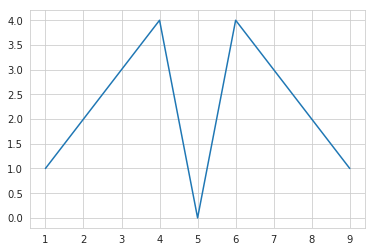

In [59]:
x = range(1,10)
y = [1,2,3,4,0,4,3,2,1]

plt.plot(x, y)

#### Plotting a line chart from a Pandas object

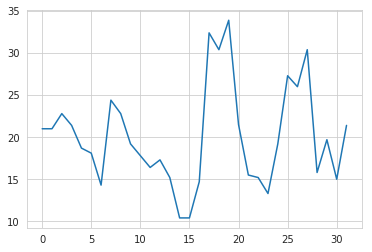

In [60]:
mpg = cars['mpg']
mpg.plot()

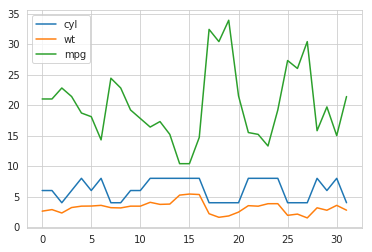

In [61]:
df = cars[['cyl', 'wt', 'mpg']]
df.plot()

### Creating bar charts
#### Creating a bar chart from a list

<BarContainer object of 9 artists>

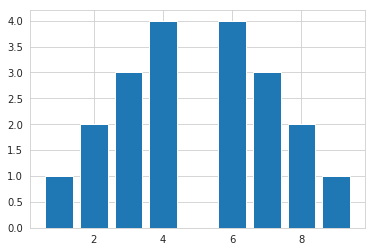

In [62]:
plt.bar(x, y)

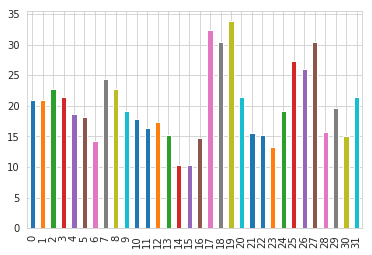

In [63]:
mpg.plot(kind='bar')

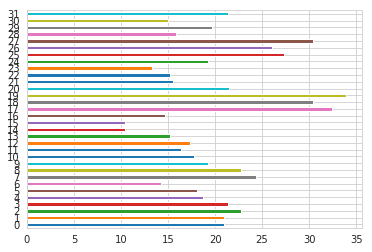

In [64]:
mpg.plot(kind='barh')

### Creating a pie chart

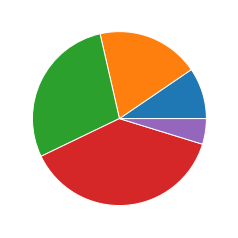

In [65]:
x = [1,2,3,4,0.5]
plt.pie(x)
plt.show()

### Saving a plot

In [66]:
plt.savefig('pie_chart.jpeg')
plt.show()

<Figure size 432x288 with 0 Axes>

In [68]:
pwd

'/home/shridhar/L'

## Plot formatting
### Defining plot color

<BarContainer object of 9 artists>

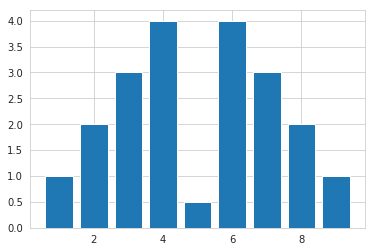

In [70]:
x = range(1, 10)
y = [1,2,3,4,0.5,4,3,2,1]

plt.bar(x, y)

<BarContainer object of 9 artists>

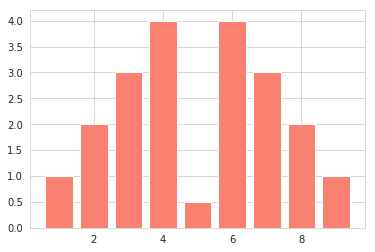

In [72]:
color = ['salmon']
plt.bar(x, y,  color=color, align='center')

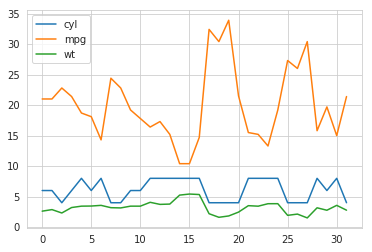

In [73]:
df = cars[['cyl', 'mpg','wt']]
df.plot()

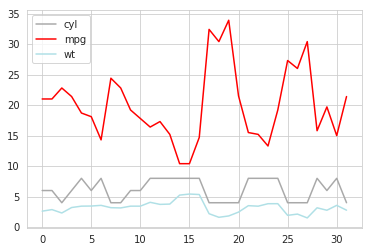

In [75]:
color_theme = ['darkgray', 'red', 'powderblue']
df.plot(color=color_theme)

### Labeling plot features
#### The functional method

Text(0, 0.5, 'your y-axis label')

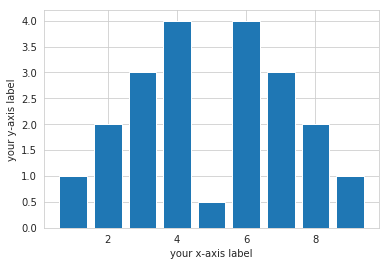

In [76]:
plt.bar(x,y)

plt.xlabel('your x-axis label')
plt.ylabel('your y-axis label')

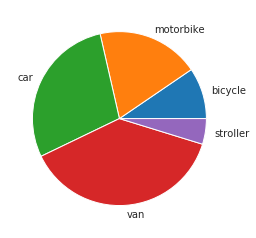

In [77]:
z = [1 , 2, 3, 4, 0.5]
veh_type = ['bicycle', 'motorbike','car', 'van', 'stroller']
plt.pie(z, labels= veh_type)
plt.show()

Text(0.5, 0, 'car names')

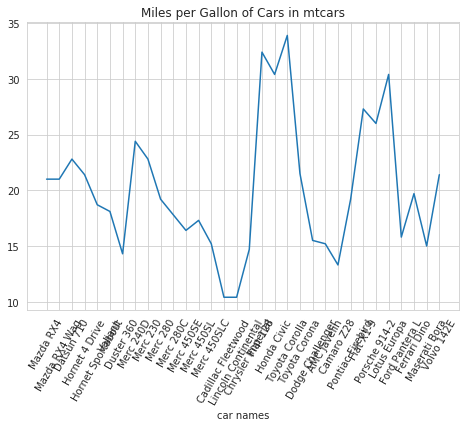

In [78]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

mpg.plot()

ax.set_xticks(range(32))

ax.set_xticklabels(cars.car_names, rotation=60, fontsize='medium')
ax.set_title('Miles per Gallon of Cars in mtcars')

ax.set_xlabel('car names')

### Adding a legend to your plot
#### The functional method

## Constructing histograms, box plots, and scatter plots

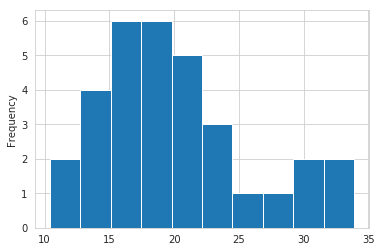

In [79]:
mpg.plot(kind='hist')

/home/shridhar/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


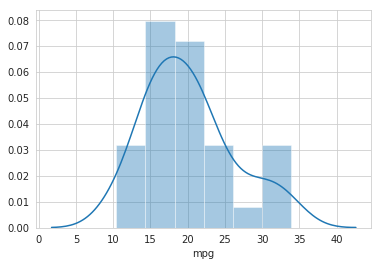

In [81]:
sb.distplot(mpg)

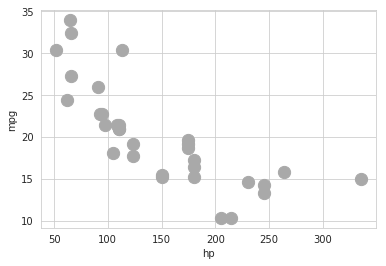

In [82]:
cars.plot(kind='scatter', x='hp', y='mpg', c=['darkgray'], s=150)

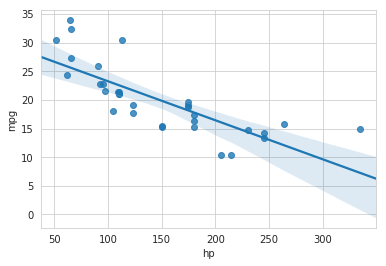

In [83]:
sb.regplot(x='hp', y='mpg', data=cars, scatter=True)

### Generating a scatter plot matrix

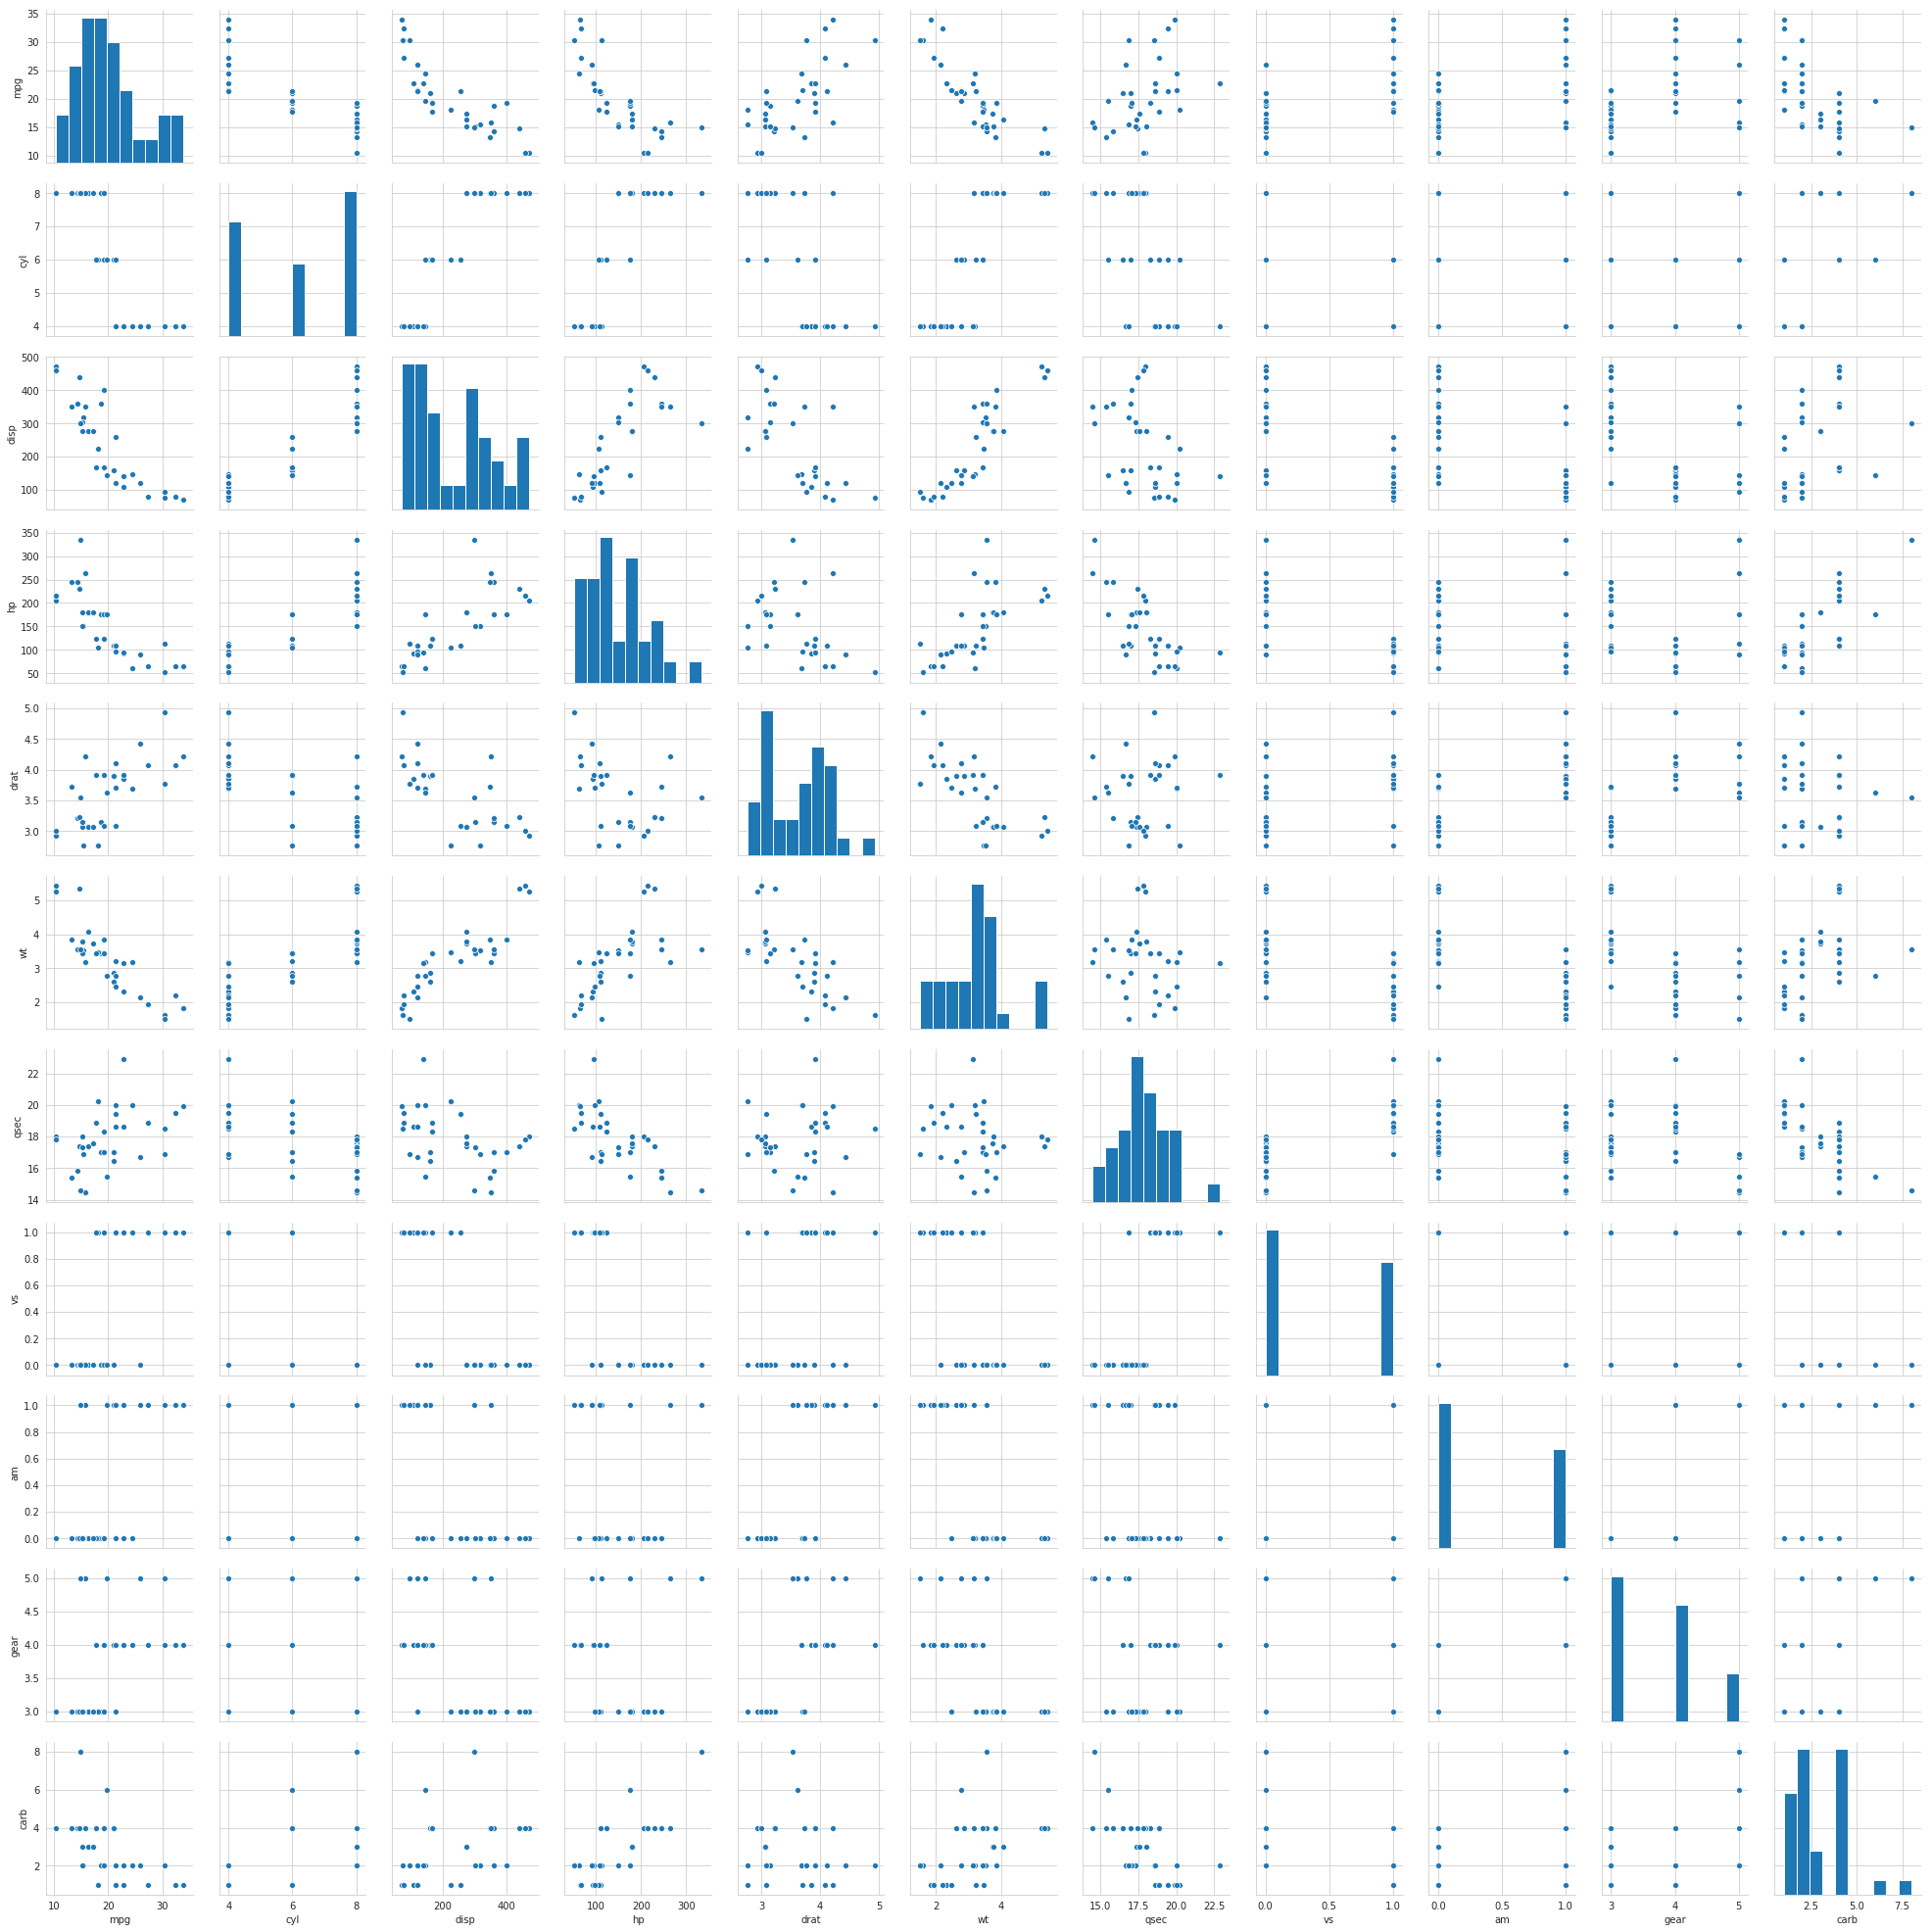

In [84]:
sb.pairplot(cars)

In [85]:
cars_df['group'] = pd.Series(cars_target, dtype="category")
sb.pairplot(cars_df, hue='group', palette='hls')

NameError: name 'cars_target' is not defined